# Animaciones

## **Dataframe**

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

# Leer el archivo
gapminder = pd.read_csv("https://raw.githubusercontent.com/OHI-Science/data-science-training/master/data/gapminder.csv")
# Modificar el dataset
gapminder = gapminder.assign(
  log_gdp=lambda df: np.log(df["gdpPercap"]),
  log_pop=lambda df: np.log(df["pop"]),
  decade=lambda df: np.floor(df["year"] / 10) * 10
)
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap,log_gdp,log_pop,decade
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.658583,15.946754,1950.0
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,6.710344,16.039154,1950.0
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,6.748878,16.144454,1960.0
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,6.728864,16.261154,1960.0
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,6.606625,16.386554,1970.0


## **Animacion 1**

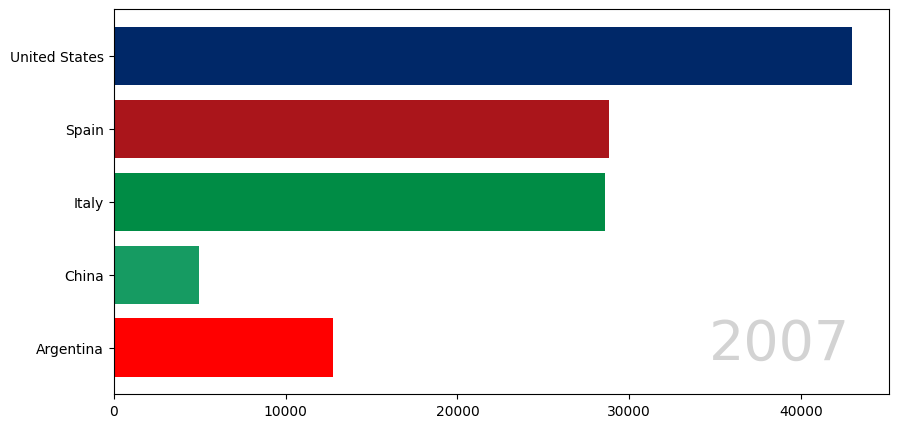

In [9]:
paises_plot = ['Spain', 'Italy', 'United States','Argentina','China']
barchart_data  = gapminder.loc[gapminder['country'].isin(paises_plot), :]

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

colors =['#FF0000','#169b62','#008c45','#aa151b','#002868']

data_temp = barchart_data.loc[barchart_data['year'] == 2007, :] #selecciono solo el anio 2007

fig, ax = plt.subplots(figsize=(10, 5)) #trabaja con formato de barra
ax.clear()
ax.barh(data_temp.country,data_temp.gdpPercap, color = colors)

ax.text(0.95, 0.2, data_temp['year'].iloc[0],
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,
       fontdict=font)
plt.show()

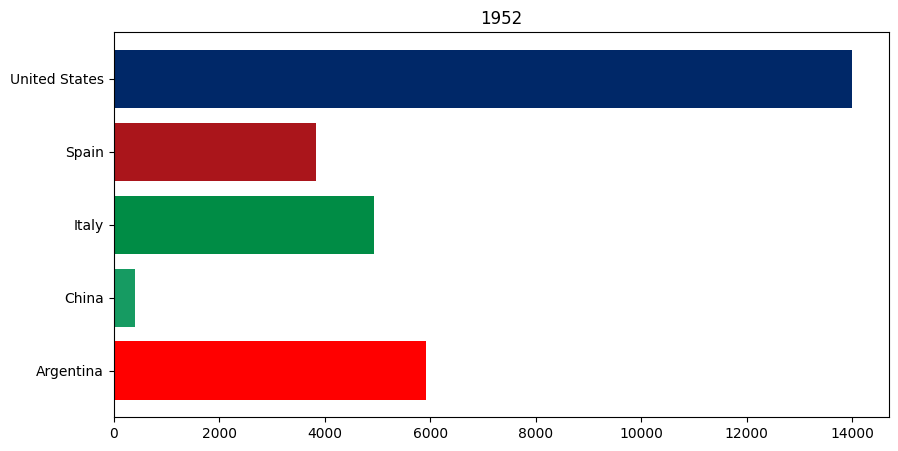

In [15]:

paises_plot = ['Spain', 'Italy', 'United States','Argentina','China']
barchart_data  = gapminder.loc[gapminder['country'].isin(paises_plot), :]

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

years = barchart_data['year'].unique()
colors =['#FF0000','#169b62','#008c45','#aa151b','#002868']

#Figura vacia
fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, years[0],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

def update_barchart(i): #interacturar con los datos
  year = years[i]
  data_temp = barchart_data.loc[barchart_data['year'] == year, :]
  ax.clear()
  ax.barh(data_temp.country,data_temp.gdpPercap, color = colors) #datos temporales de los paises, del valor per capita, variable color
  label.set_text(year)
  ax.set_title(str(year))

animacion = FuncAnimation(fig, update_barchart, frames = len(years),interval = 1000) #le defino el intervalo para que recorra
#anim.save('barchart.gif')

In [22]:
from IPython.display import HTML
HTML(animacion.to_html5_video()) #aca me hace un video con como va variando

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [21]:
pip install ffmpeg



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6090 sha256=44370edec088abaf871aa0b8c04f2d0534fb7dc25525c9ca286f3e9809492fd4
  Stored in directory: c:\users\victus\appdata\local\pip\cache\wheels\56\30\c5\576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg


In [17]:
! pip install IPython.display

ERROR: Could not find a version that satisfies the requirement IPython.display (from versions: none)
ERROR: No matching distribution found for IPython.display


## **Animación 2**

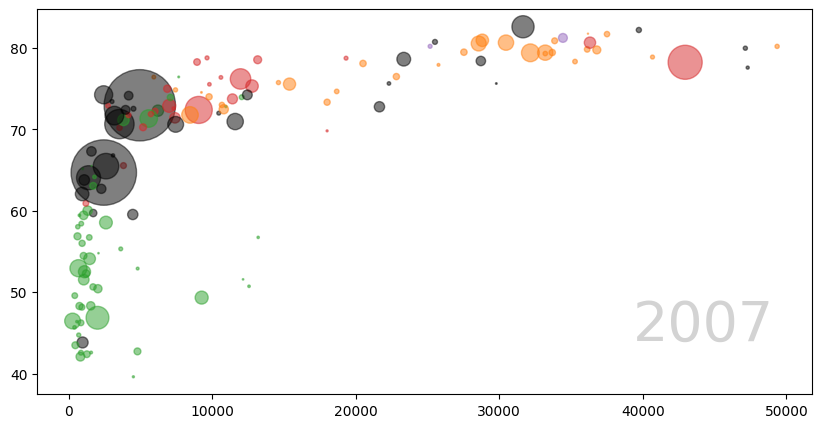

In [ ]:
import numpy as np
import matplotlib

fig, ax = plt.subplots(figsize=(10, 5))

scatter_data = gapminder.copy()

# Colores de acuerdo a la condicion
conditions = [
  scatter_data.continent == 'Asia',
  scatter_data.continent == 'Europe',
  scatter_data.continent == 'Africa',
  scatter_data.continent == 'Americas',
  scatter_data.continent == 'Oceania',
]

values = list(range(5))

scatter_data['color'] = np.select(conditions, values)


font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

years = scatter_data['year'].unique()

data_temp = scatter_data.loc[scatter_data['year'] == years[-1], :]

#Estética
label = ax.text(0.95, 0.25, years[-1],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

colors =[f'C{i}' for i in np.arange(1, 6)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(1, 5+2), colors)



scatter = ax.scatter(data_temp.gdpPercap,
                     data_temp.lifeExp,
                     s=data_temp['pop']/500000,
                     alpha = 0.5,
                     c=data_temp.color,
                     cmap=cmap,
                     norm=norm)
label.set_text(years[-1])
plt.show()

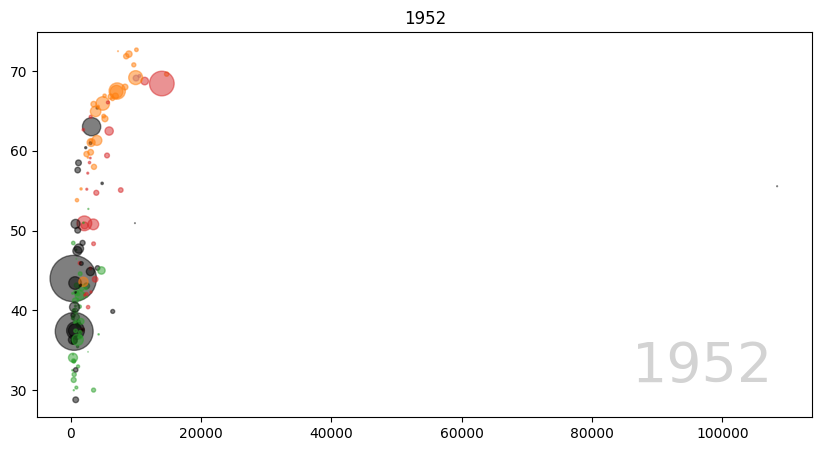

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

years = scatter_data['year'].unique()

colors =[f'C{i}' for i in np.arange(1, 6)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(1, 5+2), colors)


label = ax.text(0.95, 0.25, years[0],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)


def update_scatter(i):
    year = years[i]
    data_temp = scatter_data.loc[scatter_data['year'] == year, :]
    ax.clear()
    label = ax.text(0.95, 0.20, years[i],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    ax.scatter(
        data_temp['gdpPercap'],
        data_temp['lifeExp'],
        s=data_temp['pop']/500000,
        alpha = 0.5,
        c=data_temp.color,
        cmap=cmap,
        norm=norm
    )
    ax.set_title(str(year))

    label.set_text(year)

anim = animation.FuncAnimation(fig, update_scatter, frames = len(years), interval = 1000)
#anim.save('scatter.gif')

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())
#dependiendo de los anios la distribucion va cambaindo

## **Animacion 3**

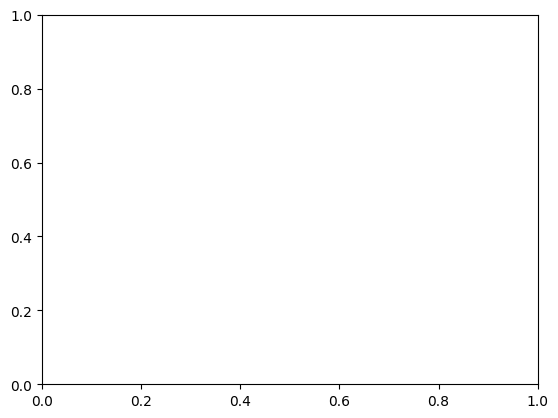

In [ ]:
from matplotlib import animation
import matplotlib.pyplot as plt
# Paises a graficar
paises_plot = ['Spain', 'Italy', 'United States']
linea_plot = gapminder.loc[gapminder['country'].isin(paises_plot), :]

# Definir los colores
colors = ['red', 'green', 'blue']
# Definir la figura --> Figura vacia
fig, ax = plt.subplots()

#Defino función, no la corró
def update_linechart(i):
  for j in range(len(colors)):
    country = paises_plot[j]
    color = colors[j]
    data = linea_plot.loc[linea_plot['country'] == country,:]
    ax.plot(data.year[:i], data.gdpPercap[:i], color)

In [ ]:
#Cantidad de cuadros que va a tener el gráfico
num_frames = len(linea_plot['year'].unique())
animacion = animation.FuncAnimation(fig, update_linechart, frames = num_frames)
#Interval=  Delay between frames in milliseconds.
# guardar la animacion en la ruta dada
plt.show(animacion)

In [ ]:
num_frames

12

In [ ]:
from IPython.display import HTML

HTML(animacion.to_html5_video())
#va motrando los graficos de lineas en video

# **PLotly**

In [23]:
!pip install chart_studio

   ---------------------------------------- 0.0/64.4 kB ? eta -:--:--
   ------ --------------------------------- 10.2/64.4 kB ? eta -:--:--
   ---------------------------------------- 64.4/64.4 kB 859.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
    --------------------------------------- 0.3/16.4 MB 6.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/16.4 MB 9.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.4/16.4 MB 9.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.9/16.4 MB 10.3 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/16.4 MB 10.5 MB/s eta 0:00:02
   ------- -------------------------------- 3.0/16.4 MB 10.7 MB/s eta 0:00:02
   -------- ------------------------------- 3.6/16.4 MB 10.8 MB/s eta 0:00:02
   ---------- ----------------------------- 4.1/16.4 MB 11.0 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/16.4 MB 11.0 MB/s eta 0:00:02
   -------

In [24]:
# Importar librerias
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
#from plotly.offline import download_plotlyjs, init_notebook_mode,plot,plot, iplot
#init_notebook_mode(connected=True)

## Elementos basicos

<Axes: >

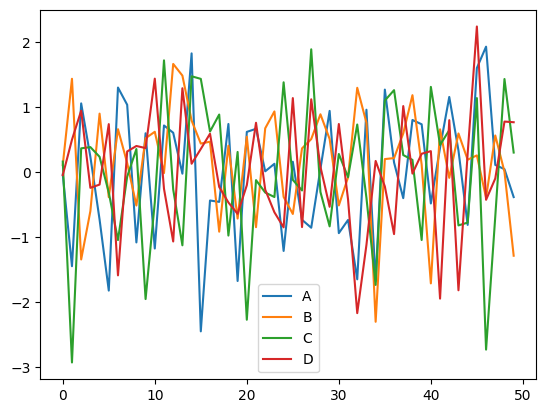

In [27]:
arr= np.random.randn(50,4)
df= pd.DataFrame(arr, columns=['A','B','C','D'])
df.head()
df.plot()
#esto no me da informacion clara de lo que quiero visualizar

In [34]:
import plotly.graph_objects as go
# Informacion de datos disponibles: https://plotly.com/python-api-reference/generated/plotly.data.html
# Precio de stocks de ['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT']
# para 2018/2019
#Me creo mi subdataset
df_stocks = px.data.stocks()
#Lo animo.
px.line(df_stocks, x='date',y='GOOG', labels={'x':'Fecha', 'y':'Precio'}) #con esto ya armo el grafico animado

#si selecciono una parte me lo agranda y ajusta al tamanio que yo quiero
#ya dentro del dataset se setea el rango de fechas del valor de la acccion

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'date=%{x}<br>GOOG=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22', '2018-01-29',
                          '2018-02-05', '2018-02-12', '2018-02-19', '2018-02-26', '2018-03-05',
                          '2018-03-12', '2018-03-19', '2018-03-26', '2018-04-02', '2018-04-09',
                          '2018-04-16', '2018-04-23', '2018-04-30', '2018-05-07', '2018-05-14',
                          '2018-05-21', '2018-05-28', '2018-06-04', '2018-06-11', '2018-06-18',
                          '2018-06-25', '2018-07-02', '2018-07-09', '2018-07-16', '2018-07-23',
                          '2018-07-30', '2018-08-06', '2018-08-13', '2018-08-20', '2018-08-27',
                          '2018-09-03', '2018-09-10', '2018-09-17', '2018-09-24', '2018-10-01',
                          '2018-10-08', '2018-10-15', '2018-10-22', '2018-10-29', '2018-11-05',
                          '2018-11-12', '2018-11-19', '2018-11-26', '2018-12-03', '2018-12-10',
                          '2018-12-17', '2018-12-24', '2018-12-31', '2019-01-07', '2019-01-14',
                          '2019-01-21', '2019-01-28', '2019-02-04', '2019-02-11', '2019-02-18',
                          '2019-02-25', '2019-03-04', '2019-03-11', '2019-03-18', '2019-03-25',
                          '2019-04-01', '2019-04-08', '2019-04-15', '2019-04-22', '2019-04-29',
                          '2019-05-06', '2019-05-13', '2019-05-20', '2019-05-27', '2019-06-03',
                          '2019-06-10', '2019-06-17', '2019-06-24', '2019-07-01', '2019-07-08',
                          '2019-07-15', '2019-07-22', '2019-07-29', '2019-08-05', '2019-08-12',
                          '2019-08-19', '2019-08-26', '2019-09-02', '2019-09-09', '2019-09-16',
                          '2019-09-23', '2019-09-30', '2019-10-07', '2019-10-14', '2019-10-21',
                          '2019-10-28', '2019-11-04', '2019-11-11', '2019-11-18', '2019-11-25',
                          '2019-12-02', '2019-12-09', '2019-12-16', '2019-12-23', '2019-12-30'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([1.        , 1.01817228, 1.03200787, 1.06678278, 1.00877316, 0.94152767,
                          0.99325918, 1.02228215, 0.97885202, 1.05244827, 1.03039293, 0.9268211 ,
                          0.93609325, 0.91363871, 0.93380695, 0.97344473, 0.93451464, 0.95099025,
                          0.99639824, 0.96745689, 0.97589437, 1.01566825, 1.01691118, 1.04538983,
                          1.04831115, 1.01217536, 1.03442119, 1.07855889, 1.07501162, 1.1236312 ,
                          1.11021292, 1.12282374, 1.08957294, 1.10743678, 1.10520487, 1.05679393,
                          1.06377984, 1.05793708, 1.08277764, 1.05000771, 1.0071219 , 0.99476514,
                          0.97209293, 0.95968179, 0.9672664 , 0.96303858, 0.92891685, 0.9929235 ,
                          0.94043891, 0.94544695, 0.88868929, 0.94089253, 0.97140341, 0.95913735,
                          0.99639824, 0.9898025 , 1.0077298 , 0.99349508, 1.01036085, 1.00738504,
                          1.03516508, 1.03637169, 1.07460329, 1.0936919 , 1.06448752, 1.09518889,
                          1.1049146 , 1.12169875, 1.15418749, 1.07545616, 1.05628593, 1.05449867,
                          1.02834253, 1.00127018, 0.96716662, 0.98468559, 1.01782752, 0.98065744,
                          1.0266369 , 1.03871247, 1.0252851 , 1.1344366 , 1.08324942, 1.07782408,
                          1.06837956, 1.04450982, 1.0779057 , 1.09317481, 1.12459294, 1.11585611,
                          1.11146493, 1.09686728, 1.10271901, 1.1

In [29]:
pip install nbformat --upgrade



   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   --------------- ------------------------ 30.7/78.5 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 78.5/78.5 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/88.3 kB ? eta -:--:--
   ---------------------------------------- 88.3/88.3 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
   ---------------------------------------- 60.8/60.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/209.0 kB ? eta -:--:--
   ---------------------------------------- 209.0/209.0 kB 6.4 MB/s eta 0:00:00


In [33]:
px.line(df_stocks, x='date', y=['GOOG','AAPL'],labels={'x':'Date','y':'Price'},
        title='Apple vs Google')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=GOOG<br>date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'GOOG',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'GOOG',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22', '2018-01-29',
                          '2018-02-05', '2018-02-12', '2018-02-19', '2018-02-26', '2018-03-05',
                          '2018-03-12', '2018-03-19', '2018-03-26', '2018-04-02', '2018-04-09',
                          '2018-04-16', '2018-04-23', '2018-04-30', '2018-05-07', '2018-05-14',
                          '2018-05-21', '2018-05-28', '2018-06-04', '2018-06-11', '2018-06-18',
                          '2018-06-25', '2018-07-02', '2018-07-09', '2018-07-16', '2018-07-23',
                          '2018-07-30', '2018-08-06', '2018-08-13', '2018-08-20', '2018-08-27',
                          '2018-09-03', '2018-09-10', '2018-09-17', '2018-09-24', '2018-10-01',
                          '2018-10-08', '2018-10-15', '2018-10-22', '2018-10-29', '2018-11-05',
                          '2018-11-12', '2018-11-19', '2018-11-26', '2018-12-03', '2018-12-10',
                          '2018-12-17', '2018-12-24', '2018-12-31', '2019-01-07', '2019-01-14',
                          '2019-01-21', '2019-01-28', '2019-02-04', '2019-02-11', '2019-02-18',
                          '2019-02-25', '2019-03-04', '2019-03-11', '2019-03-18', '2019-03-25',
                          '2019-04-01', '2019-04-08', '2019-04-15', '2019-04-22', '2019-04-29',
                          '2019-05-06', '2019-05-13', '2019-05-20', '2019-05-27', '2019-06-03',
                          '2019-06-10', '2019-06-17', '2019-06-24', '2019-07-01', '2019-07-08',
                          '2019-07-15', '2019-07-22', '2019-07-29', '2019-08-05', '2019-08-12',
                          '2019-08-19', '2019-08-26', '2019-09-02', '2019-09-09', '2019-09-16',
                          '2019-09-23', '2019-09-30', '2019-10-07', '2019-10-14', '2019-10-21',
                          '2019-10-28', '2019-11-04', '2019-11-11', '2019-11-18', '2019-11-25',
                          '2019-12-02', '2019-12-09', '2019-12-16', '2019-12-23', '2019-12-30'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([1.        , 1.01817228, 1.03200787, 1.06678278, 1.00877316, 0.94152767,
                          0.99325918, 1.02228215, 0.97885202, 1.05244827, 1.03039293, 0.9268211 ,
                          0.93609325, 0.91363871, 0.93380695, 0.97344473, 0.93451464, 0.95099025,
                          0.99639824, 0.96745689, 0.97589437, 1.01566825, 1.01691118, 1.04538983,
                          1.04831115, 1.01217536, 1.03442119, 1.07855889, 1.07501162, 1.1236312 ,
                          1.11021292, 1.12282374, 1.08957294, 1.10743678, 1.10520487, 1.05679393,
                          1.06377984, 1.05793708, 1.08277764, 1.05000771, 1.0071219 , 0.99476514,
                          0.97209293, 0.95968179, 0.9672664 , 0.96303858, 0.92891685, 0.9929235 ,
                          0.94043891, 0.94544695, 0.88868929, 0.94089253, 0.97140341, 0.95913735,
                          0.99639824, 0.9898025 , 1.0077298 , 0.99349508, 1.01036085, 1.00738504,
                          1.03516508, 1.03637169, 1.07460329, 1.0936919 , 1.06448752, 1.09518889,
                          1.1049146 , 1.12169875, 1.15418749, 1.07545616, 1.05628593, 1.05449867,
                          1.02834253, 1.00127018, 0.96716662, 0.98468559, 1.01782752, 0.98065744,
                          1.0266369 , 1.03871247, 1.0252851 , 1.1344366 , 1.08324942, 1.07782408,
                          1.06837956, 1.04450982, 1.0779057 , 1.09317481, 1.12459294, 1.11585611,
                          1.11146493, 1.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL,
                         mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN,
                         mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG,
                         mode='lines+markers', name='Google',
                         line=dict(color='firebrick',width=2,
                                   dash='dashdot')))
fig.update_layout(title='Precio de acciones 2018/19',
                  xaxis_title='Precio',yaxis_title='Fecha')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL,
                         mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN,
                         mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG,
                         mode='lines+markers', name='Google',
                         line=dict(color='firebrick',width=2,
                                   dash='dashdot')))
fig.update_layout(
    xaxis=dict(showline=True, showgrid=False, showticklabels=True,
               linecolor='rgb(204,204,204)', linewidth=2, ticks='outside',
               tickfont=dict(family='Arial', size=12, color='rgb(82,82,82)')
               ),
               yaxis=dict(showgrid=False, zeroline=False, showline=False,
                          showticklabels=False
               ),
               autosize=False,
               margin=dict(
                   autoexpand=False,l=100, r=20, t=110),
                           showlegend=True, plot_bgcolor='white'
        )

# Bar charts

In [35]:
df_us= px.data.gapminder().query("country=='United States'")
px.bar(df_us, x='year', y='pop') #

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'year=%{x}<br>pop=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007],
                         dtype=int64),
              'xaxis': 'x',
              'y': array([157553000, 171984000, 186538000, 198712000, 209896000, 220239000,
                          232187835, 242803533, 256894189, 272911760, 287675526, 301139947],
                         dtype=int64),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'pop'}}}
})

: 

In [ ]:
df_tips= px.data.tips()
px.bar(df_tips, x='day',y='tip',color='sex',
       title='Propinas por genero en cada dia',
       labels={'tip':'Propina', 'day':'Dia de trabajo'})

In [ ]:
df_europe= px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig=px.bar(df_europe, y='pop', x='country', text='pop', color='country')
fig.update_traces(texttemplate= '%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle= -45)
fig

# Scatterplot

In [ ]:
df_iris= px.data.iris()
px.scatter(df_iris, x='sepal_width', y='sepal_length',color='species', size='petal_length',
           hover_data=['petal_width'])

In [ ]:
fig= go.Figure()
fig.add_trace(go.Scatter(
  x=df_iris.sepal_width, y= df_iris.sepal_length, mode='markers',
  marker_color=df_iris.sepal_width, text=df_iris.species, marker=dict(showscale=True)
))
fig.update_traces(marker_line_width= 2, marker_size=10)

# Piecharts

In [ ]:
df_america= px.data.gapminder().query("year==2007").query("continent= ='Americas' and (country in ('Colombia','Uruguay','Argentina','Peru','Chile','Brazil','Ecuador','Venezuela','Paraguay','Bolivia'))")
px.pie(df_america, values='pop', names='country', title='Poblacion America',
       color_discrete_sequence= px.colors.sequential.RdBu)

In [ ]:
colors=['blue','green','black','purple','red','brown']
fig= go.Figure(data=[go.Pie(labels=['Water','Grass','Normal',
                                    'Psychic','Fire','Ground'],
                            values=[110,90,80,80,70,60])])
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  textinfo= 'label+percent',pull=[0.1, 0, 0.2, 0, 0, 0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))

# **Histogramas**

In [ ]:
df_tips= px.data.tips()
px.histogram(df_tips, x='total_bill',color='sex')

# **Boxplots**

In [ ]:
df_tips= px.data.tips()
px.box(df_tips, x='sex', y='tip', points='all')

In [ ]:
px.box(df_tips, x='day',y='tip',color='sex')

In [ ]:
fig= go.Figure()
fig.add_trace(go.Box(x=df_tips.sex, y=df_tips.tip, marker_color='blue',
                     boxmean='sd'))

In [ ]:
df_stocks= px.data.stocks()
fig= go.Figure()
fig.add_trace(go.Box(y=df_stocks.GOOG, boxpoints='all',
                     fillcolor='blue',jitter=0.5,
                     whiskerwidth=0.2))
fig.add_trace(go.Box(y=df_stocks.AAPL, boxpoints='all',
                     fillcolor='red',jitter=0.5,
                     whiskerwidth=0.2))
fig.update_layout(title='Google vs Apple',yaxis=dict(gridcolor='rgb(255,255,255)',
                                                     gridwidth= 3),
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)')

# **Heatmap**

In [ ]:
f= sns.load_dataset('flights')
fig= px.density_heatmap(f, x='year', y='month',z= 'passengers',
                        marginal_x= 'histogram',
                        marginal_y='histogram')
fig

# **Actividad 1**

In [ ]:
!pip install gapminder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gapminder import gapminder
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
gapminder.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [ ]:
gapminder.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [ ]:
import plotly.express as px
df_x= px.data.gapminder().query("year == 2007")
fig=px.bar(df_x, y='pop', x='country', text='pop', color='country')
fig.update_traces(texttemplate= '%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle= -45)
fig

# **Actividad 2**

In [ ]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/JJTorresDS/ds-data-sources/main/properati_venta_201501.csv')
df

,id,created_on,operation,property_type,country_name,state_name,lat_lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2
0,8ebed78a3c75018c0351ef91a93e1098b03e75c8,2014-11-27,sell,apartment,Argentina,Córdoba,"-31.4121796494,-64.1712732402",62.0,62.0,888.847742
1,8a6dc3c73890f7cce002f8ee6f03bf1d8c04858c,2014-11-19,sell,house,Argentina,Córdoba,"-31.3686142,-64.2264862",240.0,180.0,487.503625
2,7222ebd6e652ea6c0df50c97988b8314a67b6a22,2014-09-03,sell,store,Argentina,Córdoba,"-32.6521427143,-62.3049577995",10000.0,1000.0,160.000000
3,6cf16e0c074d7f0d426c36ada31faba4d6b157f0,2015-01-05,sell,house,Argentina,Córdoba,"-31.3183975,-64.290657",325.0,16250.0,256.004892
4,d0e9ecf25d7215e5b1c29b4a6519f536ee6c0917,2014-12-01,sell,apartment,Argentina,Córdoba,"-31.4017318015,-64.2206747204",78.0,78.0,535.467821
...,...,...,...,...,...,...,...,...,...,...
18886,fea6e875390bd29e5816b76f10fdf08d735aa120,2014-07-17,sell,house,Argentina,Bs.As. G.B.A. Zona Oeste,NaN,200.0,40.0,375.000000
18887,ff89f4314dd78088a58967f4df0d9441f3823245,2014-09-24,sell,house,Argentina,Buenos Aires Interior,"-38.6932635,-62.2709836",200.0,140.0,750.000000
18888,48251babfa086011b8cfead936347ef8f211bbb1,2014-10-01,sell,house,Argentina,Bs.As. G.B.A. Zona Norte,"-34.3649989,-58.7406683",200.0,200.0,1750.000000
18889,fdc52ff7c3d362b489b5a0384f0b806c8d4c1ed9,2014-09-17,sell,house,Argentina,Bs.As. G.B.A. Zona Oeste,NaN,200.0,95.0,675.000000


In [ ]:
# Separar la columna lat/lon
df[['lat', 'lon']]=df['lat_lon'].str.split(',', expand=True)
df.head()

,id,created_on,operation,property_type,country_name,state_name,lat_lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon
0,8ebed78a3c75018c0351ef91a93e1098b03e75c8,2014-11-27,sell,apartment,Argentina,Córdoba,"-31.4121796494,-64.1712732402",62.0,62.0,888.847742,-31.4121796494,-64.1712732402
1,8a6dc3c73890f7cce002f8ee6f03bf1d8c04858c,2014-11-19,sell,house,Argentina,Córdoba,"-31.3686142,-64.2264862",240.0,180.0,487.503625,-31.3686142,-64.2264862
2,7222ebd6e652ea6c0df50c97988b8314a67b6a22,2014-09-03,sell,store,Argentina,Córdoba,"-32.6521427143,-62.3049577995",10000.0,1000.0,160.000000,-32.6521427143,-62.3049577995
3,6cf16e0c074d7f0d426c36ada31faba4d6b157f0,2015-01-05,sell,house,Argentina,Córdoba,"-31.3183975,-64.290657",325.0,16250.0,256.004892,-31.3183975,-64.290657
4,d0e9ecf25d7215e5b1c29b4a6519f536ee6c0917,2014-12-01,sell,apartment,Argentina,Córdoba,"-31.4017318015,-64.2206747204",78.0,78.0,535.467821,-31.4017318015,-64.2206747204


In [ ]:
df['lat']=df.lat.astype(float)
df['lon']=df.lon.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18891 entries, 0 to 18890
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     18891 non-null  object 
 1   created_on             18891 non-null  object 
 2   operation              18891 non-null  object 
 3   property_type          18891 non-null  object 
 4   country_name           18891 non-null  object 
 5   state_name             18891 non-null  object 
 6   lat_lon                16176 non-null  object 
 7   surface_total_in_m2    10941 non-null  float64
 8   surface_covered_in_m2  12920 non-null  float64
 9   price_usd_per_m2       8541 non-null   float64
 10  lat                    16176 non-null  float64
 11  lon                    16176 non-null  float64
dtypes: float64(5), object(7)
memory usage: 1.7+ MB


In [ ]:
# Check for missing values in 'lat' and 'lon' columns
print(df['lat'].isnull().sum())
print(df['lon'].isnull().sum())

# Drop rows with missing values in 'lat' or 'lon'
df = df.dropna(subset=['lat', 'lon'])

0
0


In [ ]:
pip install folium

In [ ]:
import folium  #needed for interactive map
from folium.plugins import HeatMap

In [ ]:
df.isnull().sum()

id                          0
created_on                  0
operation                   0
property_type               0
country_name                0
state_name                  0
lat_lon                     0
surface_total_in_m2      7292
surface_covered_in_m2    5347
price_usd_per_m2         9096
lat                         0
lon                         0
dtype: int64

In [ ]:
df= df.dropna()
df.isnull().sum()

id                       0
created_on               0
operation                0
property_type            0
country_name             0
state_name               0
lat_lon                  0
surface_total_in_m2      0
surface_covered_in_m2    0
price_usd_per_m2         0
lat                      0
lon                      0
dtype: int64

In [ ]:
# Precio
max_amount = float(df['price_usd_per_m2'].max())

In [ ]:
max_amount

51623.06451612903

In [ ]:
len(df)

18891

In [ ]:
# Check for missing values in 'lat' and 'lon' columns
print(df['lat'].isnull().sum())
print(df['lon'].isnull().sum())

# Drop rows with missing values in 'lat' or 'lon'
df = df.dropna(subset=['lat', 'lon'])

In [ ]:


#Cargamos el mapa base.
folium_hmap = folium.Map(location=[-44, -58],
                        zoom_start=4,
                        tiles="OpenStreetMap")

#El pluggin de HM previamente importado
hm_wide = HeatMap((df['lat'], df['lon']),
                   min_opacity=0.8,
                   max_val=max_amount,
                   radius=10, blur=6,
                   max_zoom=15,
                 )

#Mostrarlo en el mapa
folium_hmap.add_child(hm_wide)

In [ ]:


# Now try creating the HeatMap again
max_amount = float(df['price_usd_per_m2'].max())

folium_hmap = folium.Map(location=[-40, -120],
                        zoom_start=5,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list((df['lat'], df['lon'], df['surface_total_in_m2'])),
                   min_opacity=0.8,
                   max_val=max_amount,
                   radius=10, blur=6,
                   max_zoom=15,
                 )

folium_hmap.add_child(hm_wide)

In [ ]:
# Area
max_amount = float(df['price_usd_per_m2'].max())

folium_hmap = folium.Map(location=[-40, -120],
                        zoom_start=5,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(df['lat'], df['lon'], df['surface_total_in_m2'])),
                   min_opacity=0.8,
                   max_val=max_amount,
                   radius=10, blur=6,
                   max_zoom=15,
                 )

folium_hmap.add_child(hm_wide)